In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

from pandas_datareader import data
from scipy.optimize import minimize

# Important notes

### There are things that need to be input manually.
<br> - Weights for each category 
<br> - Reading the right CSVs
<br> - Results read df and prints


### Agressive 100/00
#### 100% Stocks | 0% Bonds
<br> 30% Technology 
<br> 20% Healthcare
<br> 20% Real Estate
<br> 15% Industrial
<br> 15% Consumer Cyclical


# Read the the right CSVs

In [2]:
stocks = pd.read_csv('../selected_stocks_aggressive_v3.csv')


adjClose_5y = pd.read_csv('Cleaned_AdjCloseP_5y.csv', index_col='Date')
close_5y = pd.read_csv('Cleaned_CloseP_5y.csv', index_col='Date')

In [3]:
stocks["sector"].value_counts()

Technology                35
Industrials               29
Healthcare                18
Consumer Cyclical         18
Basic Materials            6
Financial Services         5
Communication Services     4
Energy                     2
Real Estate                2
Utilities                  1
Name: sector, dtype: int64

In [4]:
industry = stocks[stocks["sector"]=="Industrials"]
tech = stocks[stocks["sector"]=="Technology"]
consumer_cyc = stocks[stocks["sector"]=="Consumer Cyclical"]
healthcare = stocks[stocks["sector"]=="Healthcare"]
finServices = stocks[stocks["sector"]=="Financial Services"]
basic = stocks[stocks["sector"]=="Basic Materials"]
realEstate = stocks[stocks["sector"]=="Real Estate"]
energy = stocks[stocks["sector"]=="Energy"]
commService = stocks[stocks["sector"]=="Communication Services"]

In [5]:
T_bill_return = quandl.get('USTREASURY/YIELD')['5 YR'][-1]/100

### Weights for each category

In [6]:
w_bonds = 0.3
w_tech = 0.15*0.7
w_healthcare = 0.15*0.7
w_realestate = 0.25*0.7
w_industrial = 0.25*0.7
w_consumercyc = 0.2*0.7

categories = ['Technology', 'Healthcare', 'Real Estate', 'Industrial', 'Consumer Cyclical', 'Bonds']
cal_weights = [w_tech, w_healthcare, w_realestate, w_industrial, w_consumercyc, w_bonds]

In [7]:
for n in range(len(categories)):
    print(f'Complete {categories[n]} weights: ', cal_weights[n])

Complete Technology weights:  0.105
Complete Healthcare weights:  0.105
Complete Real Estate weights:  0.175
Complete Industrial weights:  0.175
Complete Consumer Cyclical weights:  0.13999999999999999
Complete Bonds weights:  0.3


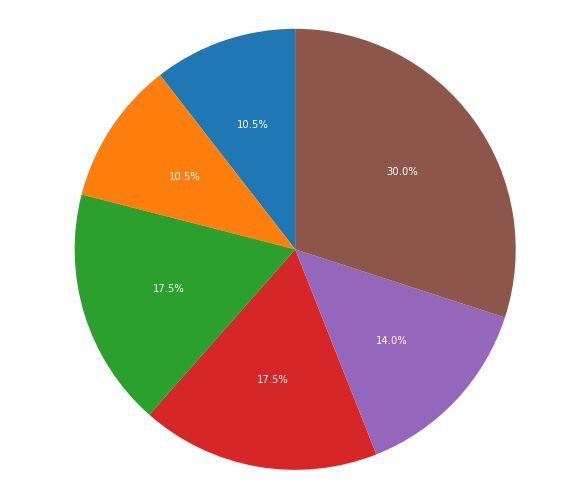

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = categories
sizes = cal_weights
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'color':"w"})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Example for minimization function:
### 10 000$ to be invested
### Required Rate of Return 35%, minimum variance

### RR for each category (Only Use as comparative to make sure we meet the requirements)

In [9]:
# amount_to_invest = 10000

# rr_bonds = w_bonds * 0.35
# rr_stocks = w_stocks * 0.35

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

## Building function: Test on Technology

In [10]:
# tech

In [11]:
# n = len(adjClose_5y[tech['ticker']].columns)
# log_returns_tech = np.log(adjClose_5y[tech['ticker']] / adjClose_5y[tech['ticker']].shift(1)).dropna() # Same as 1 + stocks_data.pct_change()
# log_returns_tech

In [12]:
# def calculate_vol(weights):
#     annualized_cov = np.dot(log_returns_tech.cov()*252,weights)
#     vol = np.dot(weights.transpose(),annualized_cov)
#     return np.sqrt(vol)
    
# def calculate_returns(weights, log_returns):
#     # Annual log Returns

#     return np.sum(log_returns.mean()*weights) * 252

# def function_to_minimize(weights):

#     # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
#     return -1 * ((calculate_returns(weights, log_returns_tech) - T_bill_return )/calculate_vol(weights)) 

In [13]:
# bounds = tuple((0,1) for n in range(n))
# constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1})
# equal_weights = n * [1/n] 

In [14]:
# results = minimize(fun=function_to_minimize,
#         x0=equal_weights,
#         bounds=bounds,
#         constraints=constraints)

# results

In [15]:
# # results['x']
# portfolio = {}
# p = 0
# for i in results['x']:
#     print('Put',(i*100).round(3), "% in", log_returns_tech.columns[p])

#     portfolio[log_returns_tech.columns[p]] = (i).round(5)
#     p += 1

In [16]:
# tech_portfolio_w = {}
# for b in portfolio:
#     if portfolio[b] != 0:
#         tech_portfolio_w[b] = portfolio[b]
# tech_portfolio_w

In [17]:
# tech_pf_returns = {}
# for b in tech_portfolio_w.keys():
#     tech_pf_returns[b] = tech[tech['ticker'] == b].iloc[0]['annu_return_5y'].round(5)

# tech_sum_return = sum(tech_portfolio_w[k]*tech_pf_returns[k] for k in tech_portfolio_w)
# tech_weighted_return = w_tech * tech_sum_return


# tech_pf_vol = {}
# for n in tech_portfolio_w.keys():
#     tech_pf_vol[n] = tech[tech['ticker'] == n].iloc[0]['AHV_5y'].round(5)

# tech_sum_var = sum(tech_portfolio_w[k]*tech_pf_vol[k] for k in tech_portfolio_w)
# tech_weighted_volatility = w_tech * tech_sum_var

In [18]:
# print(f"Tech portfolio weights: ", tech_portfolio_w)
# print(f"Tech portfolio returns: ", tech_sum_return)
# print(f"Tech portfolio weighted returns: ", tech_weighted_return)
# print(f"Tech portfolio volatility: ", tech_sum_var)
# print(f"Tech portfolio weighted volatility: ", tech_weighted_volatility)

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Final Function

In [19]:
def sharpe_ratio_min(sector_df, sector_weight, sector_name):
    
    n = len(adjClose_5y[sector_df['ticker']].columns)
    log_ret = np.log(adjClose_5y[sector_df['ticker']] / adjClose_5y[sector_df['ticker']].shift(1)).dropna()

    
    def calculate_vol(weights):
        annualized_cov = np.dot(log_ret.cov()*252,weights)
        vol = np.dot(weights.transpose(),annualized_cov)
        return np.sqrt(vol)
    
    def calculate_returns(weights, log_returns):
        # Annual log Returns

        return np.sum(log_returns.mean()*weights) * 252

    def function_to_minimize(weights):

        # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
        return -1 * ((calculate_returns(weights, log_ret) - T_bill_return )/calculate_vol(weights)) 


    bounds = tuple((0,1) for n in range(n))
    constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1})
    equal_weights = n * [1/n] 

    results = minimize(fun=function_to_minimize,
        x0=equal_weights,
        bounds=bounds,
        constraints=constraints)
    

    portfolio = {}
    p = 0
    for i in results['x']:
        portfolio[log_ret.columns[p]] = (i).round(5)
        p += 1

    final_portfolio = {}
    for b in portfolio:
        if portfolio[b] != 0:
            final_portfolio[b] = portfolio[b] * sector_weight

    
    pf_returns = {}
    for b in final_portfolio.keys():
        pf_returns[b] = (sector_df[sector_df['ticker'] == b].iloc[0]['annu_return_5y'].round(5))

        pf_returns[b] = pf_returns[b] * final_portfolio[b]


    pf_vol = {}
    for n in final_portfolio.keys():
        pf_vol[n] = (sector_df[sector_df['ticker'] == n].iloc[0]['AHV_5y'].round(5))

        pf_vol[n] = pf_vol[n] * final_portfolio[n]

    pf_sector = {}
    for n in final_portfolio.keys():
        pf_sector[n] = sector_name

    return final_portfolio, pf_returns, pf_vol, results['success'], sector_name, pf_sector

# Industrials

In [20]:
industry_results = sharpe_ratio_min(industry, w_industrial, 'Industry')

print("Success: ", industry_results[3])
print("Sector: ", industry_results[4])
print("industry portfolio weights: ", industry_results[0])
print("industry portfolio weighted returns: ", industry_results[1])
print("industry portfolio weighted volatility: ", industry_results[2])


Success:  True
Sector:  Industry
industry portfolio weights:  {'LHX': 0.013826749999999999, 'ODFL': 0.10151224999999998, 'GLDD': 0.00539525, 'HSON': 0.01370425, 'ISSC': 0.00114975, 'KRNT': 0.014195999999999999, 'QRHC': 0.008407, 'RCII': 0.01277325, 'SBLK': 0.0040355}
industry portfolio weighted returns:  {'LHX': 0.0026310922574999994, 'ODFL': 0.038844677584999994, 'GLDD': 0.0012017919375, 'HSON': 0.0024022179825, 'ISSC': 0.00019803294, 'KRNT': 0.005569942559999999, 'QRHC': 0.0020536619599999997, 'RCII': 0.0037557186975, 'SBLK': 0.0010903517449999999}
industry portfolio weighted volatility:  {'LHX': 0.0037802334499999995, 'ODFL': 0.030251665622499996, 'GLDD': 0.0021963523225, 'HSON': 0.006468680084999999, 'ISSC': 0.0006262918199999999, 'KRNT': 0.0072484776, 'QRHC': 0.00592617837, 'RCII': 0.00613575837, 'SBLK': 0.00235794265}


# Technology

In [21]:
tech_results = sharpe_ratio_min(tech, w_tech, 'Technology')

print("Success: ", tech_results[3])
print("Sector: ", tech_results[4])
print("Stocks portfolio weights: ", tech_results[0])
print("Stocks portfolio weighted returns: ", tech_results[1])
print("Stocks portfolio weighted volatility: ", tech_results[2])

Success:  True
Sector:  Technology
Stocks portfolio weights:  {'AMD': 0.0083643, 'EPAM': 0.0105651, 'APPS': 0.03281355, 'ASML': 0.020096999999999997, 'AUDC': 0.01645455, 'DSGX': 0.00118965, 'TTD': 0.015516899999999998}
Stocks portfolio weighted returns:  {'AMD': 0.004764388923, 'EPAM': 0.004465233864, 'APPS': 0.043478938156499995, 'ASML': 0.008261072819999998, 'AUDC': 0.005967571648499999, 'DSGX': 0.00031599483300000003, 'TTD': 0.014835397751999999}
Stocks portfolio weighted volatility:  {'AMD': 0.004718385273, 'EPAM': 0.00397670364, 'APPS': 0.023594254991999998, 'ASML': 0.007248384989999999, 'AUDC': 0.007344652937999999, 'DSGX': 0.00034669969950000003, 'TTD': 0.010604094291}


# Consumer Cyclical

In [22]:
consumer_cyc_results = sharpe_ratio_min(consumer_cyc, w_consumercyc, 'Consumer Cyclical')

print("Success: ", consumer_cyc_results[3])
print("Sector: ", consumer_cyc_results[4])
print("Stocks portfolio weights: ", consumer_cyc_results[0])
print("Stocks portfolio weighted returns: ", consumer_cyc_results[1])
print("Stocks portfolio weighted volatility: ", consumer_cyc_results[2])


Success:  True
Sector:  Consumer Cyclical
Stocks portfolio weights:  {'TSLA': 0.04258939999999999, 'CHDN': 0.011387599999999998, 'CLAR': 0.030013199999999997, 'FIVE': 0.0050862, 'FOXF': 0.010751999999999998, 'HTHT': 0.0056798, 'LULU': 0.034491799999999996}
Stocks portfolio weighted returns:  {'TSLA': 0.03149869434599999, 'CHDN': 0.004073572271999999, 'CLAR': 0.009203247648, 'FIVE': 0.0016913140859999998, 'FOXF': 0.003953295359999999, 'HTHT': 0.0013918917879999998, 'LULU': 0.012461887339999998}
Stocks portfolio weighted volatility:  {'TSLA': 0.026028937703999996, 'CHDN': 0.004882547375999999, 'CLAR': 0.011811094595999999, 'FIVE': 0.0023036417039999997, 'FOXF': 0.004974090239999999, 'HTHT': 0.00279588155, 'LULU': 0.013550448547999997}


# Healthcare

In [23]:
healthcare_results = sharpe_ratio_min(healthcare, w_healthcare, 'Healthcare')

print("Success: ", healthcare_results[3])
print("Sector: ", healthcare_results[4])
print("Stocks portfolio weights: ", healthcare_results[0])
print("Stocks portfolio weighted returns: ", healthcare_results[1])
print("Stocks portfolio weighted volatility: ", healthcare_results[2])


Success:  True
Sector:  Healthcare
Stocks portfolio weights:  {'IDXX': 0.024647699999999998, 'BDSI': 0.00422835, 'CDMO': 0.0131775, 'EDAP': 0.0009114, 'ICLR': 0.00846195, 'MEDP': 0.0027079499999999998, 'OPRX': 0.022664249999999997, 'RGEN': 0.0236607, 'XOMA': 0.0045423}
Stocks portfolio weighted returns:  {'IDXX': 0.0071781496709999995, 'BDSI': 0.0010428379604999999, 'CDMO': 0.00862625505, 'EDAP': 0.00015877499400000002, 'ICLR': 0.0018876071864999998, 'MEDP': 0.0009343781475, 'OPRX': 0.018328125689999995, 'RGEN': 0.010607801631, 'XOMA': 0.001687782411}
Stocks portfolio weighted volatility:  {'IDXX': 0.007521738609, 'BDSI': 0.0023927809815, 'CDMO': 0.009069414375000001, 'EDAP': 0.0005820747240000001, 'ICLR': 0.002512860672, 'MEDP': 0.0013489111334999998, 'OPRX': 0.015389025749999998, 'RGEN': 0.009826525317, 'XOMA': 0.003130008084}


# Real Estate

In [24]:
realEstate_results = sharpe_ratio_min(realEstate, w_realestate, 'Real Estate')

print("Success: ", realEstate_results[3])
print("Sector: ", realEstate_results[4])
print("Stocks portfolio weights: ", realEstate_results[0])
print("Stocks portfolio weighted returns: ", realEstate_results[1])
print("Stocks portfolio weighted volatility: ", realEstate_results[2])


Success:  True
Sector:  Real Estate
Stocks portfolio weights:  {'SBAC': 0.175}
Stocks portfolio weighted returns:  {'SBAC': 0.04152225}
Stocks portfolio weighted volatility:  {'SBAC': 0.04683}


# Bonds Results

In [25]:
bonds_weights = {'Bonds' : w_bonds}
bonds_returns = {'Bonds' : w_bonds * T_bill_return}
bonds_volatility = {'Bonds': 0}
bonds_sector = {'Bonds': 'Bonds'}

print(f"Bonds portfolio weight: ", bonds_weights)
print(f"Bonds portfolio weighted returns: ", bonds_returns)
print(f"Bonds portfolio weighted volatility: ", bonds_volatility)

Bonds portfolio weight:  {'Bonds': 0.3}
Bonds portfolio weighted returns:  {'Bonds': 0.00534}
Bonds portfolio weighted volatility:  {'Bonds': 0}


# Final results

In [26]:
complete_PF_weights = {**industry_results[0], **tech_results[0], **consumer_cyc_results[0], **healthcare_results[0], **realEstate_results[0], **bonds_weights}
complete_PF_returns = {**industry_results[1], **tech_results[1], **consumer_cyc_results[1], **healthcare_results[1], **realEstate_results[1], **bonds_returns}
complete_PF_volatility = {**industry_results[2], **tech_results[2], **consumer_cyc_results[2], **healthcare_results[2], **realEstate_results[2],**bonds_volatility}
complete_PF_sectors = {**industry_results[5], **tech_results[5], **consumer_cyc_results[5], **healthcare_results[5], **realEstate_results[5],**bonds_sector}

In [27]:
compelete_PF_DF = pd.DataFrame.from_dict(complete_PF_weights, orient='index')
compelete_PF_DF.rename(columns={0:'weights'}, inplace=True)
compelete_PF_DF['returns'] = compelete_PF_DF.index.map(complete_PF_returns)
compelete_PF_DF['volatility'] = compelete_PF_DF.index.map(complete_PF_volatility)
compelete_PF_DF['sectors'] = compelete_PF_DF.index.map(complete_PF_sectors)
# compelete_PF_DF['Example: 10k'] = compelete_PF_DF['weights'] * amount_to_invest

In [28]:
sum_df = pd.DataFrame({'weights': [sum(compelete_PF_DF['weights'])],
                    'returns' : [sum(compelete_PF_DF['returns'])],
                    'volatility' : [sum(compelete_PF_DF['volatility'])]})
sum_df

,weights,returns,volatility
0,1.000003,0.301424,0.287775


In [29]:
len(compelete_PF_DF)

34

In [30]:
compelete_PF_DF.to_csv("Aggressive_70_30_weights.csv")

# Ploting sandbox

In [30]:
all_label = list(compelete_PF_DF.sectors.unique())
labels = list(compelete_PF_DF.sectors.unique()[:-1])
print(all_label)
print(labels)

['Industry', 'Technology', 'Consumer Cyclical', 'Healthcare', 'Financial Services', 'Basic Materials', 'Real Estate', 'Energy', 'Communication Services', 'Bonds']
['Industry', 'Technology', 'Consumer Cyclical', 'Healthcare', 'Financial Services', 'Basic Materials', 'Real Estate', 'Energy', 'Communication Services']


In [31]:
len(labels)

9

In [32]:
industry_results[0].values()

dict_values([0.008617999999999999, 0.0034786666666666664, 0.01438, 0.008773333333333333, 0.03141666666666667])

In [40]:
sector_values = [[] for _ in range(len(labels))]
sector_values[0] = sorted(list(industry_results[0].values()))
sector_values[1] = sorted(list(tech_results[0].values()))
sector_values[2] = sorted(list(consumer_cyc_results[0].values()))
sector_values[3] = sorted(list(healthcare_results[0].values()))
sector_values[4] = sorted(list(finServices_results[0].values()))
sector_values[5] = sorted(list(basic_results[0].values()))
sector_values[6] = sorted(list(realEstate_results[0].values()))
sector_values[7] = sorted(list(energy_results[0].values()))
sector_values[8] = sorted(list(commService_results[0].values()))

In [41]:
sector_tickers = [[] for _ in range(len(labels))]
sector_tickers[0] = sorted(list(industry_results[0].keys()))
sector_tickers[1] = sorted(list(tech_results[0].keys()))
sector_tickers[2] = sorted(list(consumer_cyc_results[0].keys()))
sector_tickers[3] = sorted(list(healthcare_results[0].keys()))
sector_tickers[4] = sorted(list(finServices_results[0].keys()))
sector_tickers[5] = sorted(list(basic_results[0].keys()))
sector_tickers[6] = sorted(list(realEstate_results[0].keys()))
sector_tickers[7] = sorted(list(energy_results[0].keys()))
sector_tickers[8] = sorted(list(commService_results[0].keys()))

In [42]:
sector_full_weights = []
sector_full_weights.append(w_industry)
sector_full_weights.append(w_tech)
sector_full_weights.append(w_consumer_cyc)
sector_full_weights.append(w_healthcare)
sector_full_weights.append(w_finServices)
sector_full_weights.append(w_basic)
sector_full_weights.append(w_realEstate)
sector_full_weights.append(w_energy)
sector_full_weights.append(w_commService)
sector_full_weights.append(w_bonds)

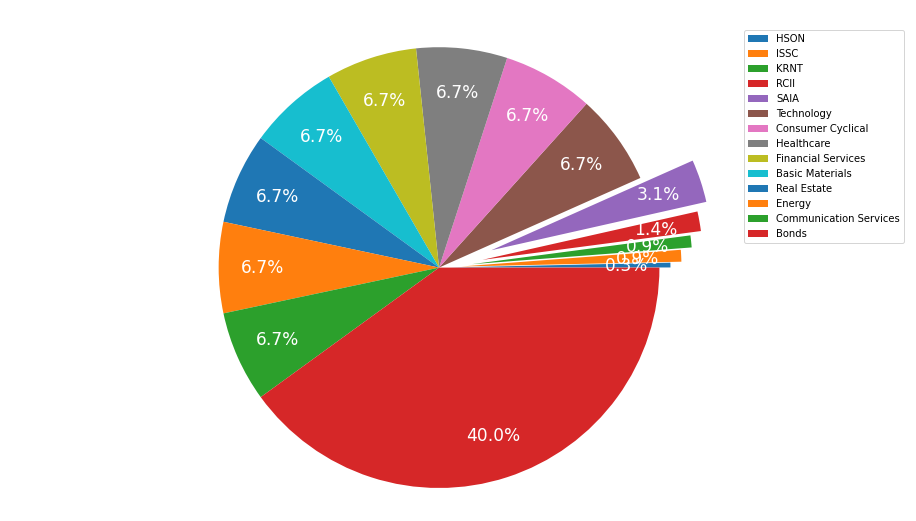

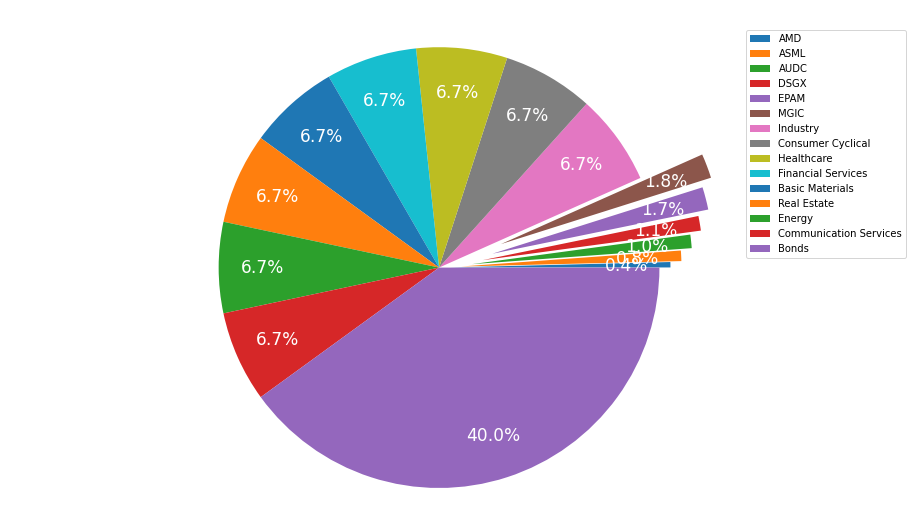

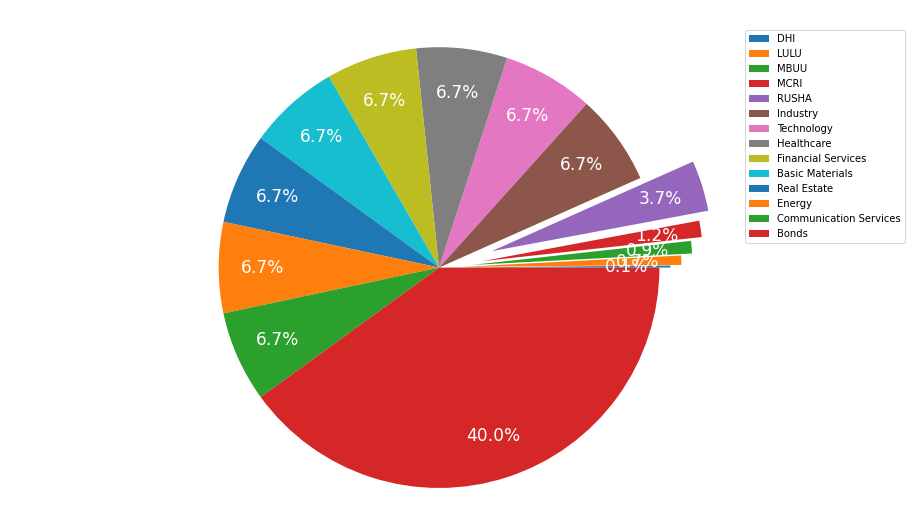

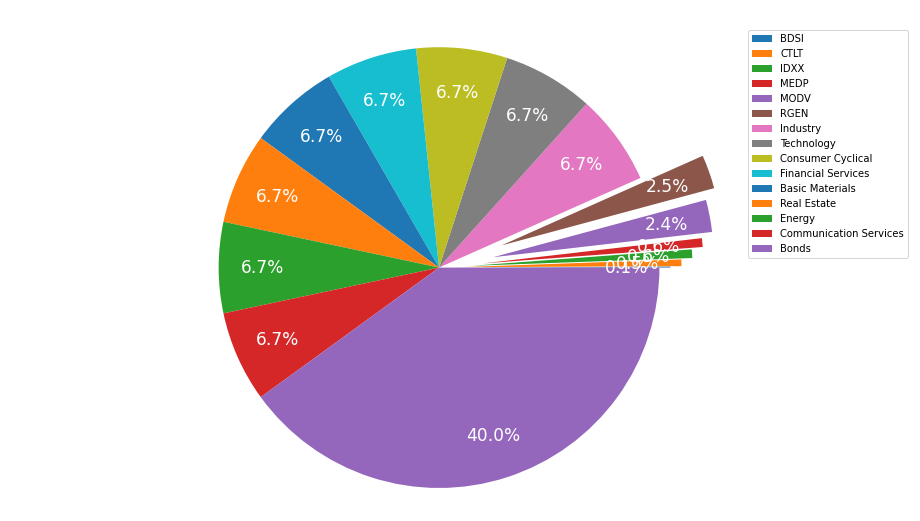

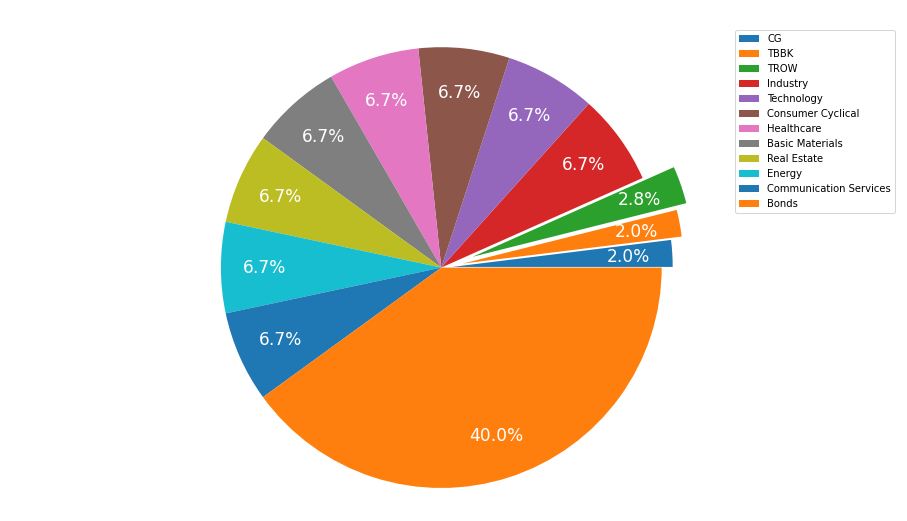

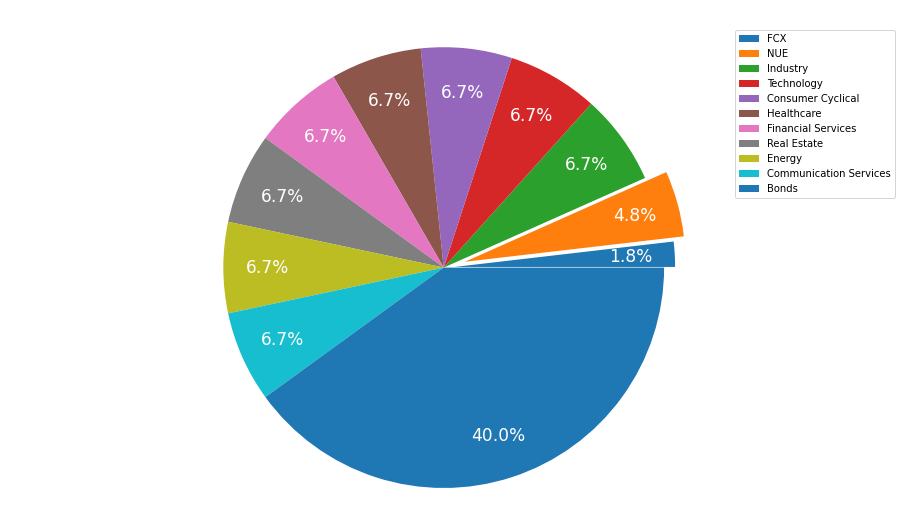

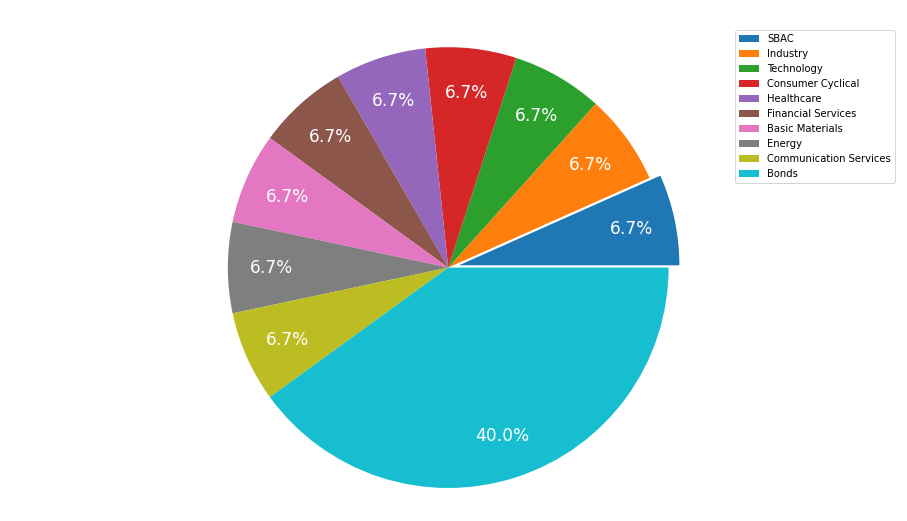

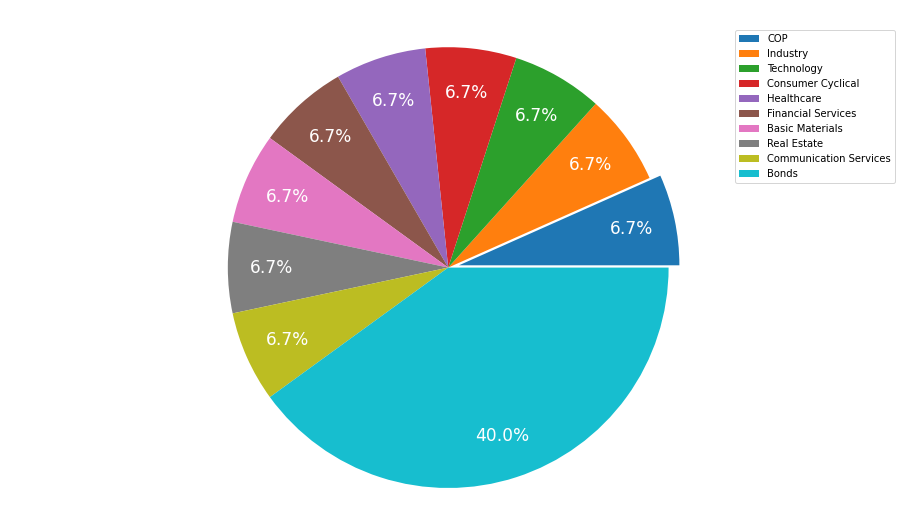

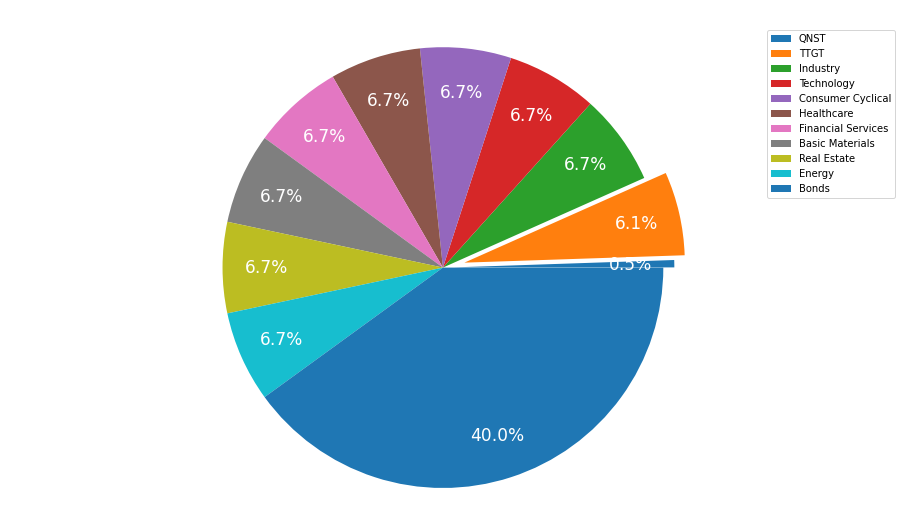

In [43]:
for i, s in enumerate(labels):

    sec_w = sector_full_weights.copy()
    sec_label = all_label.copy()
    
    sec_w.pop(i)
    sec_label.pop(i)

    counts = pd.Series(sector_values[i] + sec_w, 
                    index= sector_tickers[i] + sec_label)

    explode = tuple((0.05 + 0.05*n) for n in range(len(sector_values[i]))) + tuple((0) for n in range(len(sec_w)))

    counts.plot(figsize=(16,9), kind='pie', fontsize=17, explode=explode, textprops={'color':"w"},  autopct='%1.1f%%', pctdistance=0.8)
    plt.axis('equal')
    plt.ylabel('')
    plt.title(s + ' Breakdown',  fontsize=15, color= 'w', fontweight='bold')
    plt.legend(labels=counts.index, loc="best")
    plt.show()